In [70]:
from Bio.Seq import Seq
from Bio import SeqIO
import random as r
import matplotlib.pyplot as plt
from Bio.PDB.PDBParser import PDBParser
import warnings
warnings.filterwarnings('ignore')

In [71]:
f = open('HBB_FASTA.txt')  # open a FASTA file with the gene sequence
sequence = ''
for line in f:
    s = line.split()
    if line[0] == '>': # ignore lines that do not contain gene sequences
        continue
    else:
        sequence = sequence + s[0]  # transfer the data from the file to the string "sequence"
sequence = sequence.replace(' ','')  
sequence = sequence.replace('\n','')
# make sure there are no spaces in the string


In [72]:
# Transcription
def transcription(mutated_sequence):
    template_sequence = ''
    transcription_sequence = ''
    mutated_sequence = mutated_sequence[mutated_sequence.find('ATG'):]
    #translation starts when the ribosome encounters the start codon 'AUG' in 
    #the mRNA codon.  This corresponds to 'TAC' in the complementary strand, 
    #which corresponds to 'ATG' in the normal coding sequence.  As a result,
    #any noncoding nucleotides in the coding sequence before the start codon will
    #be discarded
    
    for i in mutated_sequence:
        if i == 'A':
            template_sequence += 'T'
        elif i == 'T':
            template_sequence += 'A'
        elif i == 'G':
            template_sequence += 'C'
        elif i == 'C':
            template_sequence += 'G'
        #Transcription occurs on the complementary strand to the normal DNA coding 
        #strand, so each DNA nucleotide is replaced with its DNA complement to 
        #generate the complementary template strand
       
    for i in template_sequence:
        if i == 'A':
            transcription_sequence += 'U'
        elif i == 'T':
            transcription_sequence += 'A'
        elif i == 'G':
            transcription_sequence += 'C'
        elif i == 'C':
            transcription_sequence += 'G'
        #These replace each DNA nucleotide with the complementary mRNA nucleotide
        #and add it to the new transcription sequence
    return transcription_sequence

In [73]:
# Translation
def translation(transcription_sequence):
    
    codons = []
    protein = ''
    for i in range(int(len(transcription_sequence)/3)):  
        codons.append(transcription_sequence[:3])  # append each set of 3 amino acids to a list of codons
        transcription_sequence = transcription_sequence[3:]  # move to the next codon

    count=0
    for i in codons:
        if i == 'AUG': 
            codons = codons[count:] 
            break
        count+=1
        # coding DNA starts at the start codon 'AUG', so this 
        # ensures that all noncoding nucleotides before this point are discarded

    for i in codons:
        if i == 'UUU' or i == 'UUC':
            protein +='F'
        elif i == 'UUA' or i=='UUG' or i=='CUU' or i=='CUA' or i=='CUG' or i=='CUC':
            protein +='L'
        elif i == 'AUU' or i=='AUC' or i=='AUA':
            protein +='I'
        elif i == 'AUG':
            protein +='M'
        elif i == 'GUU' or i=='GUC' or i=='GUA' or i=='GUG':
            protein +='V'
        elif i == 'UCU' or i=='UCC' or i=='UCA' or i=='UCG' or i=='AGU' or i=='AGC':
            protein +='S'
        elif i== 'CCU' or i=='CCC' or i=='CCA' or i=='CCG':
            protein +='P'
        elif i=='ACU' or i=='ACC' or i=='ACA' or i=='ACG':
            protein +='T'
        elif i=='GCU' or i=='GCC' or i=='GCA' or i=='GCG':
            protein +='A'
        elif i=='UAU' or i=='UAC':
            protein +='Y'
        elif i=='CAU' or i=='CAC':
            protein +='H'
        elif i=='CAA' or i=='CAG':
            protein +='Q'
        elif i=='AAU' or i=='AAC':
            protein +='N'
        elif i=='AAA' or i=='AAG':
            protein +='K'
        elif i=='GAU' or i=='GAC':
            protein +='D'
        elif i=='GAA' or i=='GAG':
            protein +='E'
        elif i=='UGU' or i=='UGC':
            protein +='C'
        elif i=='UGG':
            protein +='W'
        elif i=='CGU' or i=='CGC' or i=='CGA' or i=='CGG' or i=='AGA' or i=='AGG':
            protein +='R'
        elif i=='GGU' or i=='GGC' or i=='GGA' or i=='GGG':
            protein +='G'
        elif i=='UAA' or i=='UAG' or i=='UGA':
            break
        else:
            print('error')
        #Based on the standard genetic code, codons code for a specific amino acid
        #some codons also represent stopping points in translation, representing the 
        #end of translation, so these will break the loop to end the protein.
        #Coded amino acids are added to the string 'protein'
    return protein

In [74]:
# Printing the Amino Acid Sequence of Human Hemoglobin Beta

# The functions transcription and translation are carried out to convert the 
# gene to mRNA and then to the amino acid chain
print("Amino acid sequence of human hemoglobin beta:")
print(translation(transcription(sequence)))

Amino acid sequence of human hemoglobin beta:
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


In [75]:
# Random Mutations
mutated_sequence = sequence  # create a new mutated sequence
nucleotides = ['A','G','T','C']  # list of DNA nucleotides


In [76]:
# Point Mutations
def point_mutation():
    mutation_point = r.randint(0,len(sequence)-1)  # select the point to be mutated
    r.shuffle(nucleotides)  # shuffle nucleotides to induce a random mutation
    if sequence[mutation_point]==nucleotides[0]:
        mutated_sequence = sequence[:mutation_point] + nucleotides[1] + sequence[mutation_point+1:]
    else:
        mutated_sequence = sequence[:mutation_point] + nucleotides[0] + sequence[mutation_point+1:]
    # print('A point mutation of {0} to {1} was made at position {2}.'.format(sequence[mutation_point],mutated_sequence[mutation_point],mutation_point))
    return mutated_sequence
# these change the old nucleotide to a different one

In [77]:
# Insertion
def insertion(sequence):
    mutation_point = r.randint(0,len(sequence)-1)
    r.shuffle(nucleotides)  # shuffle nucleotides to induce a random mutation
    mutated_sequence = sequence[:mutation_point] + nucleotides[0] + sequence[mutation_point:]
    # print('The nucleotide {0} was inserted after position {1}.'.format(nucleotides[0],mutation_point-1))
    return mutated_sequence

In [78]:
# Deletion
def deletion(sequence):
    mutation_point = r.randint(0,len(sequence)-1)
    mutated_sequence = sequence[:mutation_point] + sequence[mutation_point+1:]
    # print('The nucleotide {0} was deleted from position {1}.'.format(sequence[mutation_point],mutation_point))
    return mutated_sequence


Percent Sequence Homology for Point Mutations:
99.320%: 507
100.000%: 468
2.721%: 11
Other: 14
(Note: Other denotes values that occurred less than 100 times each.)


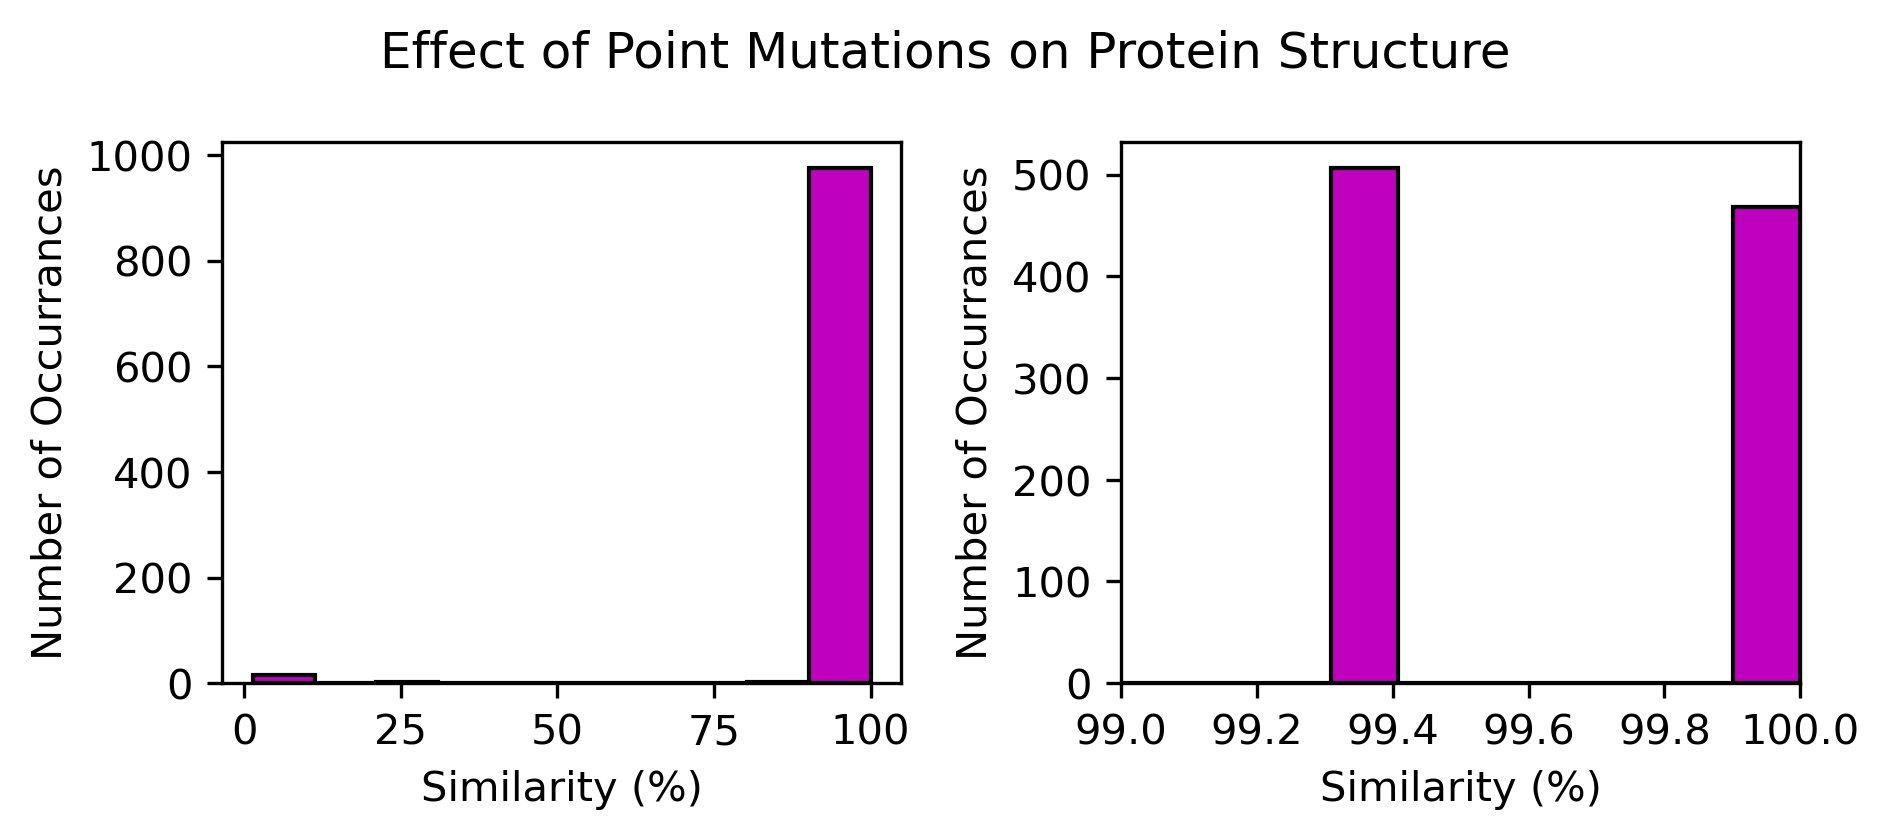

In [79]:
# Simulating Point Mutations
N = 1000 # number of trials in the simulation
PMvals = [] # set up the list for percent similarities

for i in range(N): # run the simulation 10000 times
    count = 0
    real_protein = translation(transcription(sequence)) 
    # use the transcription and translation functions to determine the normal protein's amino acid sequence
    
    mutated_protein = translation(transcription(point_mutation())) 
    #call the point_mutation function to induce a point mutation, and then determine the mutant protein amino acid sequence
    
    for a,b in zip(real_protein,mutated_protein): 
        if a == b:
            count+=1
    PMvals.append(count/len(real_protein)*100)
    #zip the two protein sequences together and then compare their similarity in terms of percentage

PM_frequencies = {} #set up a dictionary to count the occurrances of each percent similarity
for i in PMvals:
    if i in PM_frequencies:
        PM_frequencies[i] +=1
    else:
        PM_frequencies[i] = 1

Other = 0 #If a percentage occurred less than 100 times, it was added to the Other category
        
print('\nPercent Sequence Homology for Point Mutations:')
for key,value in sorted(PM_frequencies.items(), key = lambda x:x[1], reverse=True):
#sort the percentages in the dictionary so that the most frequent are printed first
    if value < 0.01*N:
        Other += value
    else:
        print('{0:.3f}%: {1}'.format(key,value))
print('Other: {0}'.format(Other))
print('(Note: Other denotes values that occurred less than 100 times each.)')
    
plt.figure(dpi=300) #Plot a histogram of the percent similarities

plt.subplot(221)
plt.hist(PMvals, bins=10, color = 'm', edgecolor = 'k')
plt.suptitle('Effect of Point Mutations on Protein Structure')
plt.xlabel('Similarity (%)')
plt.ylabel('Number of Occurrances')

plt.subplot(222) #because the 99.32% and the 100% fell into the same bin, this subplot zoomed in to differentiate them
plt.hist(PMvals, bins=1000, color = 'm', edgecolor = 'k')
plt.xlabel('Similarity (%)')
plt.ylabel('Number of Occurrances')
plt.xlim(99,100)
plt.tight_layout()
plt.show()


Percent Sequence Homology for Insertions:
100.000%: 289
5.442%: 14
56.463%: 12
29.252%: 11
54.422%: 11
10.884%: 11
53.061%: 10
Other: 642
(Note: Other denotes values that occurred less than 100 times each.)


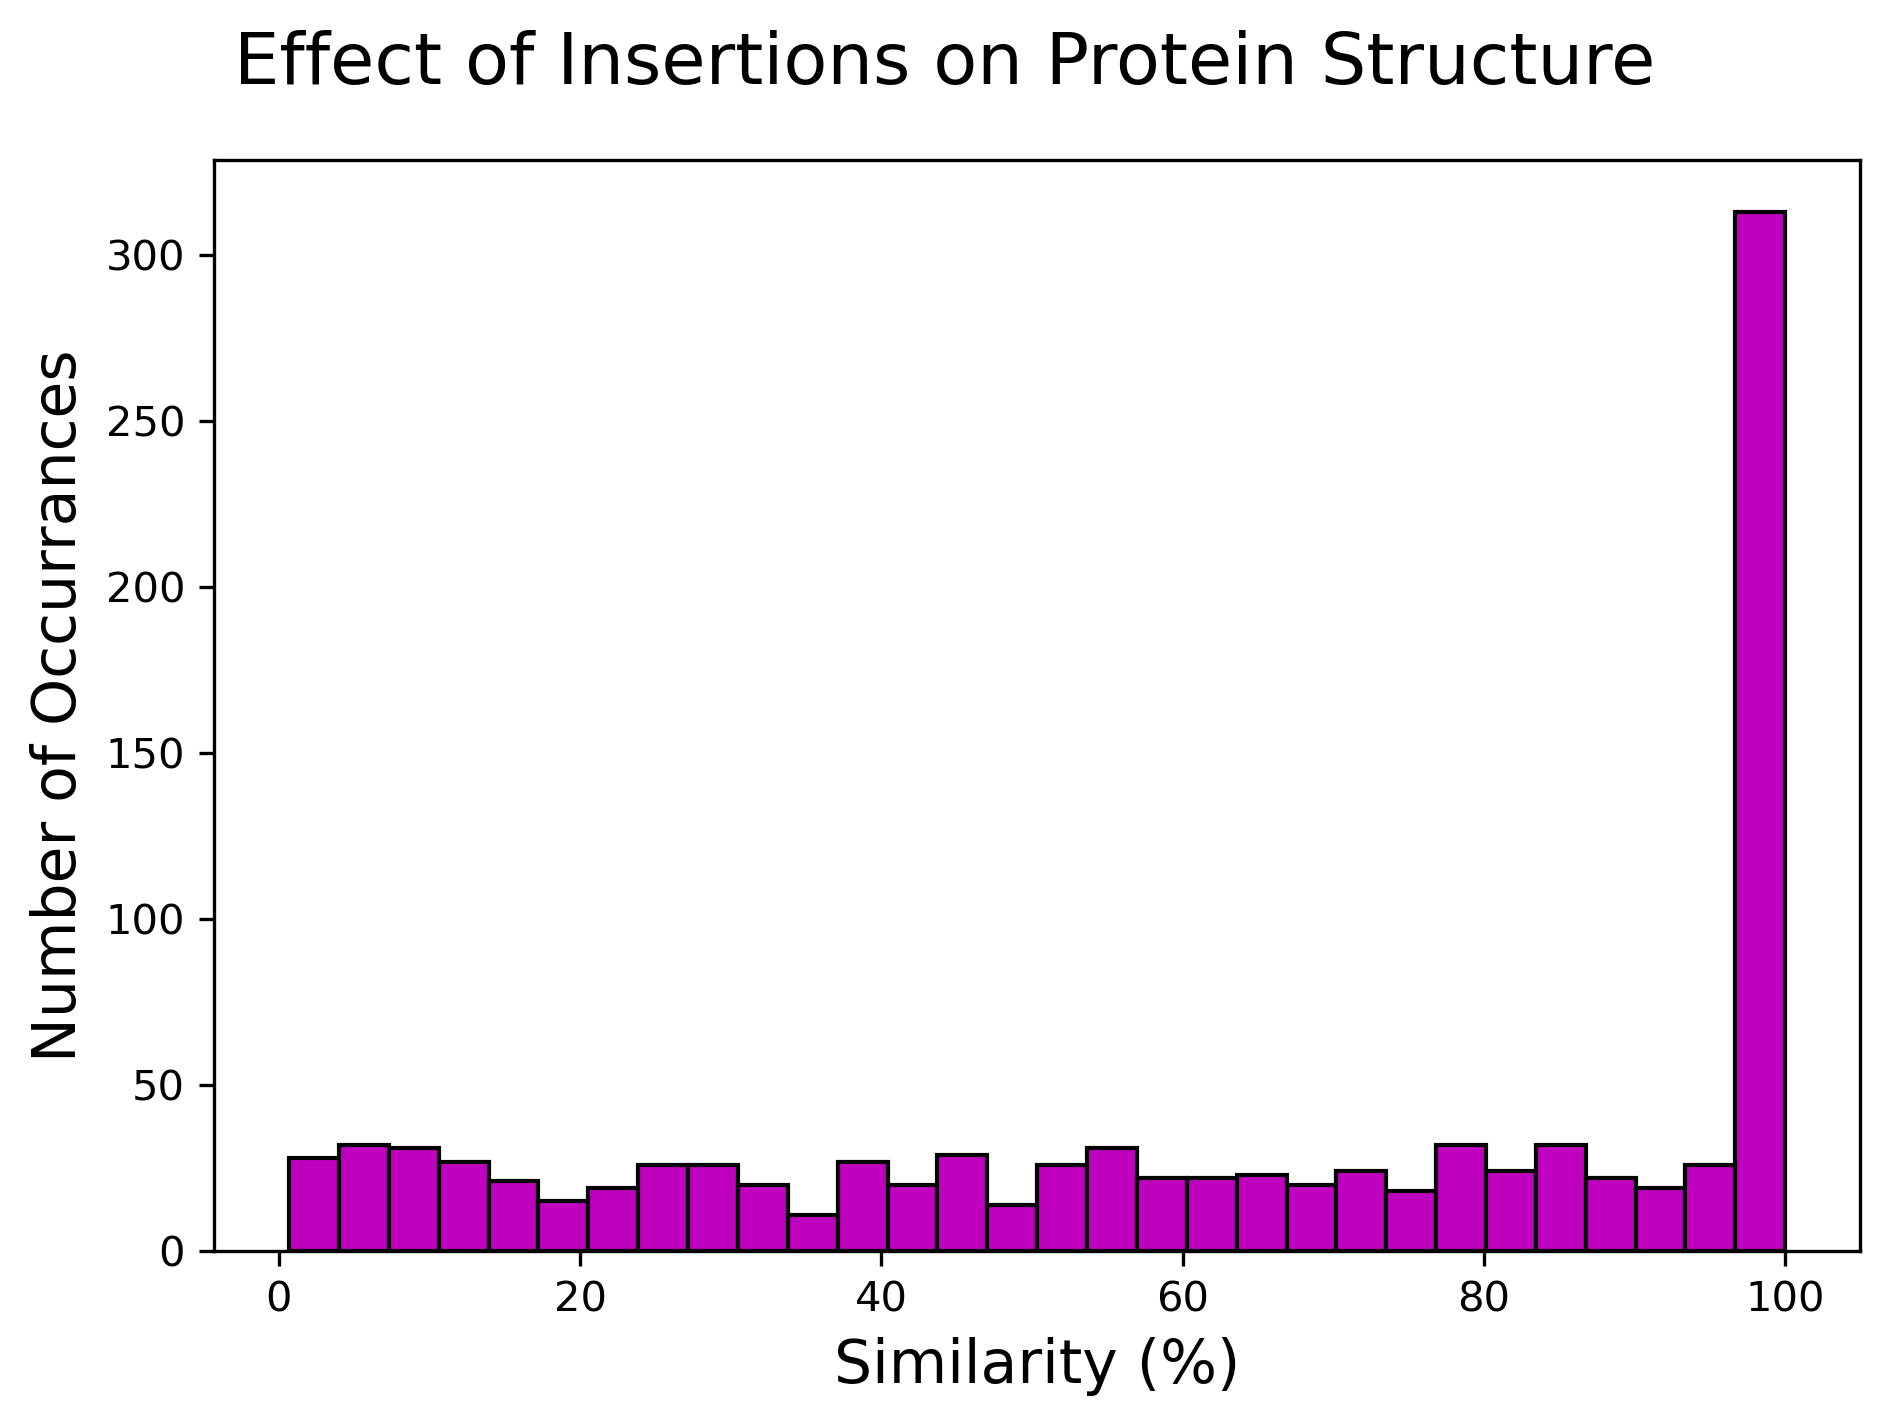

In [80]:
# Simulating Insertions
N = 1000 # number of trials
Ivals = []

for i in range(N): # run the simulation 10000 times
    count = 0
    real_protein = translation(transcription(sequence)) # normal protein sequence
    mutated_protein = translation(transcription(insertion(sequence))) # mutated protein sequence after an insertion occurred
    for a,b in zip(real_protein,mutated_protein):
        if a == b:
            count+=1
    Ivals.append(count/len(real_protein)*100) # zip the two proteins and calculate the percent similarity

I_frequencies = {} # dictionary to store the percent similarities
for i in Ivals:
    if i in I_frequencies:
        I_frequencies[i] +=1
    else:
        I_frequencies[i] = 1

Other = 0
        
print('\nPercent Sequence Homology for Insertions:')
for key,value in sorted(I_frequencies.items(), key = lambda x:x[1], reverse=True): # more sorted print statements of occurrances
    if value < 0.01*N:
        Other += value
    else:
        print('{0:.3f}%: {1}'.format(key,value))
print('Other: {0}'.format(Other))
print('(Note: Other denotes values that occurred less than 100 times each.)')
    
plt.figure(dpi=300) # histogram of the occurrances of each percent similarity
plt.hist(Ivals, bins=30, color = 'm', edgecolor = 'k')
plt.suptitle('Effect of Insertions on Protein Structure', fontsize='xx-large')
plt.xlabel('Similarity (%)', fontsize = 'x-large')
plt.ylabel('Number of Occurrances', fontsize = 'x-large')
plt.tight_layout()
plt.show()

#If the nucleotide is inserted before the start codon, then the reading frame 
#is thrown off, so the start codon is thrown off.  This produces a new, shorter
#protein with 0% similarity to the original


Percent Sequence Homology for Deletions:
100.000%: 289
90.476%: 15
35.374%: 15
31.973%: 12
42.857%: 12
27.211%: 11
17.007%: 10
45.578%: 10
55.782%: 10
31.293%: 10
Other: 606
(Note: Other denotes values that occurred less than 100 times each.)


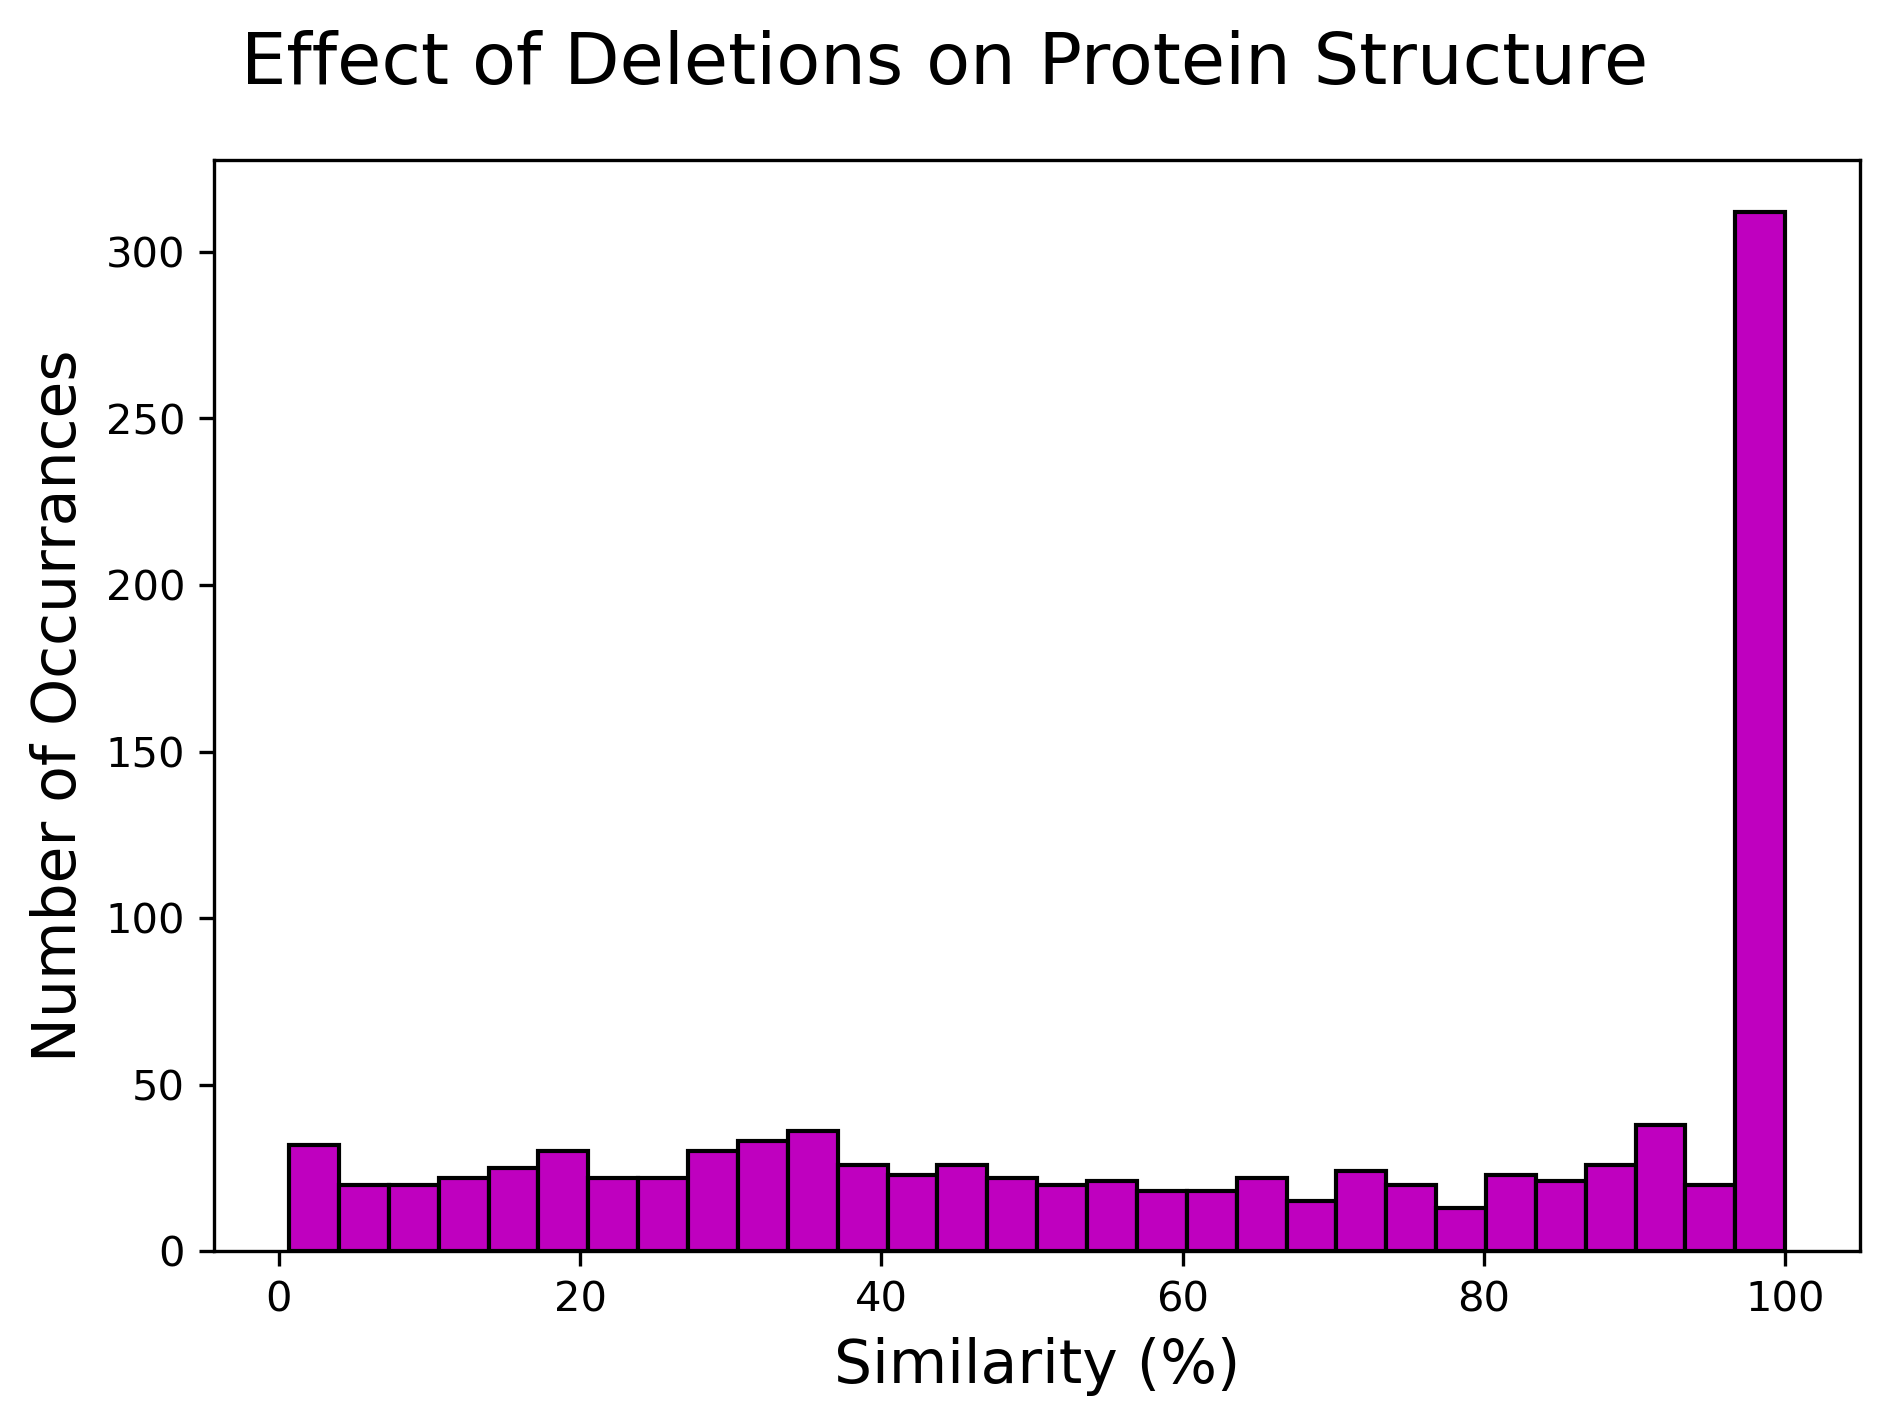

In [81]:
# Simulating Deletions
N = 1000 # number of trials
Dvals = []

for i in range(N): # run the simulation 10000 times
    count = 0
    real_protein = translation(transcription(sequence)) # normal protein sequence
    mutated_protein = translation(transcription(deletion(sequence))) # mutated protein sequence after the deletion
    for a,b in zip(real_protein,mutated_protein):
        if a == b:
            count+=1
    Dvals.append(count/len(real_protein)*100) # zip the proteins and calculate sequence similarity

D_frequencies = {} # dictionary to store the percent similarities
for i in Dvals:
    if i in D_frequencies:
        D_frequencies[i] +=1
    else:
        D_frequencies[i] = 1

Other = 0
        
print('\nPercent Sequence Homology for Deletions:')
for key,value in sorted(D_frequencies.items(), key = lambda x:x[1], reverse=True): # more sorted print statements for occurrances
    if value < 0.01*N:
        Other += value
    else:
        print('{0:.3f}%: {1}'.format(key,value))
print('Other: {0}'.format(Other))
print('(Note: Other denotes values that occurred less than 100 times each.)')
    
plt.figure(dpi=300) # histogram of the occurrances of each percent similarity
plt.hist(Dvals, bins=30, color = 'm', edgecolor = 'k')
plt.suptitle('Effect of Deletions on Protein Structure', fontsize='xx-large')
plt.xlabel('Similarity (%)', fontsize = 'x-large')
plt.ylabel('Number of Occurrances', fontsize = 'x-large')
plt.tight_layout()
plt.show()

#If a nucleotide is deleted before the start codon, the reading frame is again
#thrown off, so the start codon is again thrown off.  The new, shorter
#protein begins when another start codon is encountered, and the new 
#protein is significantly shorter than the original with only 2.7% similarity

In [82]:
# Calculate Torsion Angles

parser = PDBParser()
structure = parser.get_structure('test','4hhb.pdb') # specifies the PDB file for the structure of human hemoglobin beta
model = structure[0] # this refers to the overall hemoglobin structure
chain = model['B'] # the beta subunit (B) of hemoglobin was considered
chain.atom_to_internal_coordinates() # defines the atoms of hemoglobin beta in terms of their positions

phi = []
psi = [] # lists to store the angles

for i in chain.get_residues(): # iterate through each residue in the protein chain
    try:
        phi.append(i.internal_coord.get_angle("phi")) # BioPython function to calculate the phi angle
        psi.append(i.internal_coord.get_angle("psi")) # BioPython function to calculate the psi angle
    except Exception:
        pass # PDB files also include water molecules and other biochemical molecules like coenzymes and phosphate groups.
        # if one of these is encountered instead of an amino acid, the program raises an error, so this iteration is skipped
    

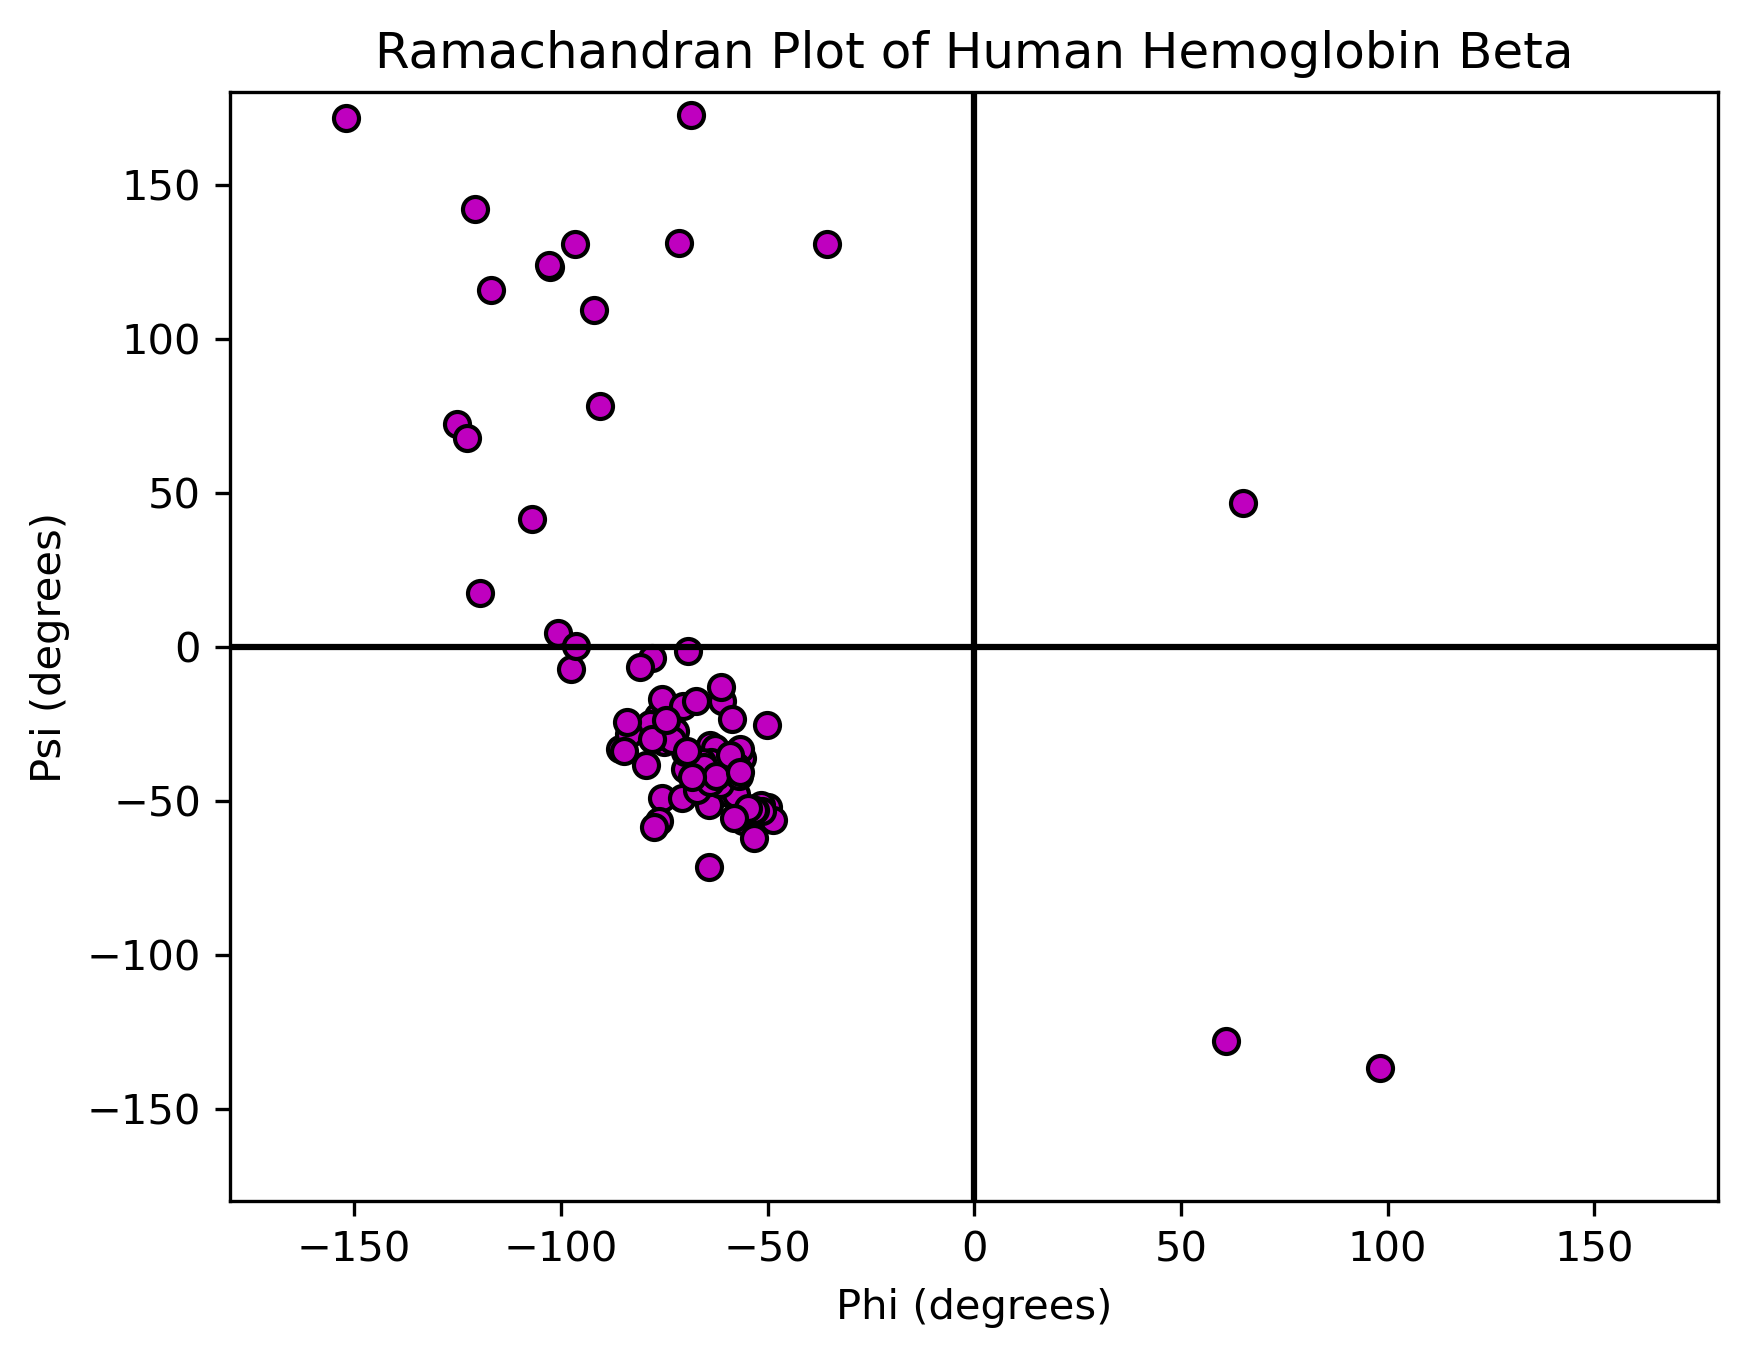

In [83]:
# Ramachandran Plot

fig = plt.figure(dpi=300) # generate the Ramachandran plot
plt.scatter(phi,psi, c='m', edgecolors = 'k')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180,180) # axes can range from -180 degrees to +180 degrees
plt.ylim(-180,180)
plt.title('Ramachandran Plot of Human Hemoglobin Beta')
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.show()